## Packages and environment setup

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.ticker as ticker

In [2]:
import geopandas as gpd
import geoplot as gpl
from geoplot import crs as gcrs
import mapclassify as mc
from shapely.geometry import Polygon

In [3]:
%matplotlib inline

In [4]:
# today = datetime.date.today().strftime("%Y%m%d")
today = '20200716'

## Data provided by "The COVID Tracking Project": https://covidtracking.com

In [41]:
daily_data = pd.read_json('https://covidtracking.com/api/v1/states/daily.json')

In [7]:
daily_data

date state  positive  probableCases   negative  pending  \
0      20210208    AK   53694.0            NaN        NaN      NaN   
1      20210208    AL  473348.0       101577.0  1820080.0      NaN   
2      20210208    AR  307373.0        62960.0  2290742.0      NaN   
3      20210208    AS       0.0            NaN     2140.0      NaN   
4      20210208    AZ  782887.0        51100.0  2820314.0      NaN   
...         ...   ...       ...            ...        ...      ...   
19256  20200117    WA       0.0            NaN        NaN      NaN   
19257  20200116    WA       0.0            NaN        NaN      NaN   
19258  20200115    WA       0.0            NaN        NaN      NaN   
19259  20200114    WA       0.0            NaN        NaN      NaN   
19260  20200113    WA       NaN            NaN        NaN      NaN   

         totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
0               totalTestsViral         1555532.0                   39.0   
1         totalTestsPeopleViral         2191851.0                 1524.0   
2               totalTestsViral         2535155.0                  777.0   
3               totalTestsViral            2140.0                    NaN   
4               totalTestsViral         6993662.0                 2853.0   
...                         ...               ...                    ...   
19256  totalTestEncountersViral               NaN                    NaN   
19257  totalTestEncountersViral               NaN                    NaN   
19258  totalTestEncountersViral               NaN                    NaN   
19259  totalTestEncountersViral               NaN                    NaN   
19260  totalTestEncountersViral               NaN                    NaN   

       hospitalizedCumulative  ...   posNeg  deathIncrease  \
0                      1219.0  ...    53694              0   
1                     43383.0  ...  2293428              8   
2                     14099.0  ...  2598115             30   
3                         NaN  ...     2140              0   
4                     54713.0  ...  3603201              7   
...                       ...  ...      ...            ...   
19256                     NaN  ...        0              0   
19257                     NaN  ...        0              0   
19258                     NaN  ...        0              0   
19259                     NaN  ...        0              0   
19260                     NaN  ...        0              0   

       hospitalizedIncrease                                      hash  \
0                         0  d85857d07675872189c4413c474e093aa816bd07   
1                       378  223d07c61fa18edd15ba5b06781eeace99993064   
2                        33  29964941e602edf52ceb795c3a222940b57d37f7   
3                         0  74ae8e0269fb6fbd5ea923792d3795972d8a4848   
4                        56  1e61ea22f77c1ef1e936cc56410665ca7c34aed5   
...                     ...                                       ...   
19256                     0  effcc7b17054638471dec2f2a9cdbd3229d92042   
19257                     0  d9453d58f00994cff1f81639e95e532d1dd10138   
19258                     0  bd1eef4afdffd883e37be1d3f321dc3b0e75f591   
19259                     0  84aeea9c6a284b151fdb42a863db3c0aadb651bf   
19260                     0  4b278ad9e69da1c2a818f761c25f10c4bb6bf2a7   

       commercialScore negativeRegularScore negativeScore positiveScore score  \
0                    0                    0             0             0     0   
1                    0                    0             0             0     0   
2                    0                    0             0             0     0   
3                    0                    0             0             0     0   
4                    0                    0             0             0     0   
...                ...                  ...           ...           ...   ...   
19256                0                    0             0           

In [24]:
cdc_data_api_end_point = 'https://data.cdc.gov/resource/9mfq-cb36.json'

In [33]:
query_limit = '50000'

In [66]:
cdc_daily_data = pd.read_json(cdc_data_api_end_point + '?$limit=' + query_limit)

In [67]:
cdc_daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23700 entries, 0 to 23699
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   submission_date  23700 non-null  object        
 1   state            23700 non-null  object        
 2   tot_cases        23700 non-null  int64         
 3   conf_cases       10341 non-null  float64       
 4   prob_cases       10341 non-null  float64       
 5   new_case         23700 non-null  int64         
 6   pnew_case        18620 non-null  float64       
 7   tot_death        23700 non-null  int64         
 8   conf_death       10503 non-null  float64       
 9   prob_death       10503 non-null  float64       
 10  new_death        23700 non-null  int64         
 11  pnew_death       18522 non-null  float64       
 12  created_at       23700 non-null  datetime64[ns]
 13  consent_cases    21725 non-null  object        
 14  consent_deaths   21725 non-null  objec

In [37]:
cdc_daily_data.query('state=="NJ"').sort_values(by='submission_date', ascending=False).head(5)

submission_date state  tot_cases  conf_cases  prob_cases  \
19661  2021-02-19T00:00:00.000    NJ     761498    678306.0     83192.0   
17448  2021-02-18T00:00:00.000    NJ     758451    675713.0     82738.0   
14991  2021-02-17T00:00:00.000    NJ     755174    673108.0     82066.0   
2033   2021-02-16T00:00:00.000    NJ     751065    669481.0     81584.0   
14024  2021-02-15T00:00:00.000    NJ     747432    666399.0     81033.0   

       new_case  pnew_case  tot_death  conf_death  prob_death  new_death  \
19661      3047      454.0      22784     20495.0      2289.0         63   
17448      3277      672.0      22721     20432.0      2289.0         89   
14991      4109      482.0      22632     20343.0      2289.0        135   
2033       3633      551.0      22497     20251.0      2246.0         31   
14024      1445      243.0      22466     20220.0      2246.0         12   

       pnew_death              created_at consent_cases consent_deaths  
19661         0.0 2021-02-20 14:45:37.694         Agree          Agree  
17448         0.0 2021-02-19 15:33:51.934         Agree          Agree  
14991        43.0 2021-02-18 14:43:57.648         Agree          Agree  
2033          0.0 2021-02-17 14:51:58.706         Agree          Agree  
14024         0.0 2021-02-16 14:53:06.974         Agree          Agree

In [46]:
NJ_data = cdc_daily_data.query('state=="NJ"').sort_values(by='submission_date', ascending=True)

In [42]:
daily_data.query('state=="NJ"').sort_values(by='date', ascending=False).head(5)

date state  positive  probableCases   negative  pending  \
34   20210219    NJ  761498.0        83192.0  9566182.0      NaN   
90   20210218    NJ  758451.0        82738.0  9502664.0      NaN   
146  20210217    NJ  755174.0        82066.0  9409262.0      NaN   
202  20210216    NJ  751065.0        81584.0  9333715.0      NaN   
258  20210215    NJ  747432.0        81033.0  9333715.0      NaN   

    totalTestResultsSource  totalTestResults  hospitalizedCurrently  \
34                  posNeg        10327680.0                 2202.0   
90                  posNeg        10261115.0                 2327.0   
146                 posNeg        10164436.0                 2370.0   
202                 posNeg        10084780.0                 2411.0   
258                 posNeg        10081147.0                 2408.0   

     hospitalizedCumulative  ...  dataQualityGrade  deathIncrease  \
34                  62958.0  ...               NaN             63   
90                  62835.0  ...               NaN             89   
146                 62718.0  ...               NaN            135   
202                 62591.0  ...               NaN             31   
258                 62454.0  ...               NaN             12   

     hospitalizedIncrease                                      hash  \
34                    123  344d0fbd1ea6e5bd42fda0a08cbd0a53ceace8f9   
90                    117  3bd924415de9fca0750c4dbb08c24b08bdb23a81   
146                   127  958353f238a119ed81a0f6fc5f522bd60e61b457   
202                   137  e347554239b42eff21155b7f3ec69453161c3168   
258                    48  bf1ed5a9a910db0ba2660621ad6a834d26b41b42   

     commercialScore negativeRegularScore negativeScore positiveScore  score  \
34                 0                    0             0             0      0   
90                 0                    0             0             0      0   
146                0                    0             0             0      0   
202                0                    0             0             0      0   
258                0                    0             0             0      0   

     grade  
34          
90          
146         
202         
258         

[5 rows x 55 columns]

In [45]:
daily_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19877 entries, 0 to 19876
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   date                         19877 non-null  int64  
 1   state                        19877 non-null  object 
 2   positive                     19688 non-null  float64
 3   probableCases                8642 non-null   float64
 4   negative                     15817 non-null  float64
 5   pending                      2059 non-null   float64
 6   totalTestResultsSource       19877 non-null  object 
 7   totalTestResults             19775 non-null  float64
 8   hospitalizedCurrently        16490 non-null  float64
 9   hospitalizedCumulative       12283 non-null  float64
 10  inIcuCurrently               10862 non-null  float64
 11  inIcuCumulative              3600 non-null   float64
 12  onVentilatorCurrently        8610 non-null   float64
 13  onVentilatorCumu

In [145]:
# daily_dataily_data = pd.read_json('daily_data_' + today + '.json')

In [146]:
current_data= pd.read_json('https://covidtracking.com/api/v1/states/current.json')

In [147]:
# current_data= pd.read_json('current_data_' + today + '.json')

## Maps setup

If maps already exists, load:

In [148]:
northeast_map = gpd.read_file("TR_Northeast.geojson")
northeast_arranged_map = gpd.read_file("TR_Northeast_arranged.geojson")

Otherwise, create them and write files for later use. Census files for states are available here: https://www2.census.gov/geo/tiger/TIGER2017//STATE/tl_2017_us_state.zip

In [149]:
northeast_states = ['CT','DC','DE','MA','MD','ME','NH','NJ','NY','PA','RI','VA','VT','WV']
northeast_territories = ['VI','PR']
northeast = northeast_states + northeast_territories

In [150]:
# northeast_states_map = usa_map[usa_map['STUSPS'].isin(northeast_states)]
# northeast_territories_map = usa_map[usa_map['STUSPS'].isin(northeast_territories)]
# northeast_map = usa_map[usa_map['STUSPS'].isin(northeast)]

In [151]:
# northeast_states_map = usa_map[usa_map['STUSPS'].isin(northeast_states)]
# northeast_territories_map = usa_map[usa_map['STUSPS'].isin(northeast_territories)]
# northeast_map = usa_map[usa_map['STUSPS'].isin(northeast)]

In [152]:
# territories_shifted = northeast_territories_map.translate(xoff=-2, yoff=20)
# northeast_territories_map_shifted = northeast_territories_map.copy()
# northeast_territories_map_shifted['geometry'] = territories_shifted
# northeast_arranged_map = northeast_states_map.append(northeast_territories_map_shifted, ignore_index=True)

In [153]:
# northeast_map.to_file("TR_Northeast.shp")
# northeast_arranged_map.to_file("TR_Northeast_arranged.shp")

In [154]:
# all_states_map = gpd.read_file('TR_All_States.geojson')

In [155]:
# northeast_states_map = usa_map[usa_map['STUSPS'].isin(northeast_states)]
# northeast_territories_map = usa_map[usa_map['STUSPS'].isin(northeast_territories)]
# northeast_map = usa_map[usa_map['STUSPS'].isin(northeast)]

In [156]:
# territories_shifted = northeast_territories_map.translate(xoff=-5, yoff=5)
# northeast_territories_map_shifted = northeast_territories_map.copy()
# northeast_territories_map_shifted['geometry'] = territories_shifted
# northeast_arranged_map = northeast_states_map.append(northeast_territories_map_shifted, ignore_index=True)
# all_states_and_territories_map = all_states_map.append(northeast_territories_map_shifted, ignore_index=True)

In [157]:
# ax = gpl.polyplot(all_states_and_territories_map, figsize=(16,12), projection=gcrs.AlbersEqualArea())
# plt.show()

In [158]:
# northeast_map.to_file("TR_Northeast.shp")
# northeast_arranged_map.to_file("TR_Northeast_arranged.shp")

## Data mangling

In [159]:
states_daily_data = daily_data.copy()
states_daily_data.set_index('date', inplace=True)

In [160]:
states_current_data = current_data.copy()
# states_current_data

In [161]:
states_daily_data.query('state==["NY","NJ"]').head(2)

state  positive   negative  pending  hospitalizedCurrently  \
date                                                                  
20200802    NJ  182350.0  1963528.0      NaN                  695.0   
20200802    NY  416298.0  5614637.0      NaN                  556.0   

          hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
date                                                                
20200802                 21565.0           113.0              NaN   
20200802                 89995.0           143.0              NaN   

          onVentilatorCurrently  onVentilatorCumulative  ...   posNeg  \
date                                                     ...            
20200802                   45.0                     NaN  ...  2145878   
20200802                   71.0                     NaN  ...  6030935   

         deathIncrease hospitalizedIncrease  \
date                                          
20200802             6                    0   
20200802             6                    0   

                                              hash commercialScore  \
date                                                                 
20200802  6ebb098658eefeeee740c46a6d1bf372201961e0               0   
20200802  cef9e33c1f6c3908cf41497cae4b3b0f4bfe4647               0   

          negativeRegularScore  negativeScore positiveScore  score  grade  
date                                                                       
20200802                     0              0             0      0         
20200802                     0              0             0      0         

[2 rows x 40 columns]

In [162]:
# ax = states_daily_data.query('date==@today').sort_values(by='positive', ascending=False).plot.bar(x='state', y='positive', figsize=(12,8), title='Cases by state (as of ' + datetime.date.today().strftime('%m/%d/%Y') + ')')

In [59]:
NJ_data_with_dates = NJ_data.copy()
NJ_data_with_dates['reference_date'] = pd.to_datetime(NJ_data_with_dates['submission_date'])
NJ_data_with_dates.set_index('reference_date', inplace=True)

In [60]:
NJ_data_with_dates

submission_date state  tot_cases  conf_cases  \
reference_date                                                         
2020-01-22      2020-01-22T00:00:00.000    NJ          0         NaN   
2020-01-23      2020-01-23T00:00:00.000    NJ          0         NaN   
2020-01-24      2020-01-24T00:00:00.000    NJ          0         NaN   
2020-01-25      2020-01-25T00:00:00.000    NJ          0         NaN   
2020-01-26      2020-01-26T00:00:00.000    NJ          0         NaN   
...                                 ...   ...        ...         ...   
2021-02-15      2021-02-15T00:00:00.000    NJ     747432    666399.0   
2021-02-16      2021-02-16T00:00:00.000    NJ     751065    669481.0   
2021-02-17      2021-02-17T00:00:00.000    NJ     755174    673108.0   
2021-02-18      2021-02-18T00:00:00.000    NJ     758451    675713.0   
2021-02-19      2021-02-19T00:00:00.000    NJ     761498    678306.0   

                prob_cases  new_case  pnew_case  tot_death  conf_death  \
reference_date                                                           
2020-01-22             NaN         0        NaN          0         NaN   
2020-01-23             NaN         0        NaN          0         NaN   
2020-01-24             NaN         0        NaN          0         NaN   
2020-01-25             NaN         0        NaN          0         NaN   
2020-01-26             NaN         0        NaN          0         NaN   
...                    ...       ...        ...        ...         ...   
2021-02-15         81033.0      1445      243.0      22466     20220.0   
2021-02-16         81584.0      3633      551.0      22497     20251.0   
2021-02-17         82066.0      4109      482.0      22632     20343.0   
2021-02-18         82738.0      3277      672.0      22721     20432.0   
2021-02-19         83192.0      3047      454.0      22784     20495.0   

                prob_death  new_death  pnew_death              created_at  \
reference_date                                                              
2020-01-22             NaN          0         NaN 2020-03-26 16:22:39.452   
2020-01-23             NaN          0         NaN 2020-03-26 16:22:39.452   
2020-01-24             NaN          0         NaN 2020-03-26 16:22:39.452   
2020-01-25             NaN          0         NaN 2020-03-26 16:22:39.452   
2020-01-26             NaN          0         NaN 2020-03-26 16:22:39.452   
...                    ...        ...         ...                     ...   
2021-02-15          2246.0         12         0.0 2021-02-16 14:53:06.974   
2021-02-16          2246.0         31         0.0 2021-02-17 14:51:58.706   
2021-02-17          2289.0        135        43.0 2021-02-18 14:43:57.648   
2021-02-18          2289.0         89         0.0 2021-02-19 15:33:51.934   
2021-02-19          2289.0         63         0.0 2021-02-20 14:45:37.694   

               consent_cases consent_deaths  
reference_date                               
2020-01-22             Agree          Agree  
2020-01-23             Agree          Agree  
2020-01-24             Agree          Agree  
2020-01-25             Agree          Agree  
2020-01-26             Agree          Agree  
...                      ...            ...  
2021-02-15             Agree          Agree  
2021-02-16             Agree          Agree  
2021-02-17             Agree          Agree  
2021-02-18             Agree          Agree  
2021-02-19             Agree          Agree  

[395 rows x 15 columns]

In [62]:
NJ_data_with_dates.loc[NJ_data_with_dates.loc[:, 'new_case'] < 0, 'new_case'] = 0

In [64]:
NJ_data_with_dates.describe()

tot_cases     conf_cases    prob_cases      new_case     pnew_case  \
count     395.000000      55.000000     55.000000    395.000000    307.000000   
mean   234314.491139  519398.418182  58323.418182   1952.043038    270.983713   
std    203233.550156  193864.277433  27351.141508   2272.946362   1415.068659   
min         0.000000   85301.000000      0.000000      0.000000 -15976.000000   
25%    117459.000000  525544.500000  56988.500000    346.000000     27.000000   
50%    186241.000000  590400.000000  67806.000000    831.000000     62.000000   
75%    288148.000000  639222.000000  76357.500000   3578.500000    528.000000   
max    761498.000000  678306.000000  83192.000000  23925.000000  18156.000000   

          tot_death    conf_death   prob_death    new_death   pnew_death  
count    395.000000    307.000000   307.000000   395.000000   307.000000  
mean   12327.387342  14255.859935  1487.039088    57.681013     7.456026  
std     7196.315998   3067.528930   796.110146   121.499617   107.369896  
min        0.000000   4202.000000     0.000000  -175.000000  -184.000000  
25%     6999.000000  13344.000000  1783.000000     4.000000     0.000000  
50%    15857.000000  14273.000000  1812.000000    19.000000     0.000000  
75%    16508.500000  15444.500000  1920.000000    76.000000     0.000000  
max    22784.000000  20495.000000  2289.000000  1877.000000  1854.000000

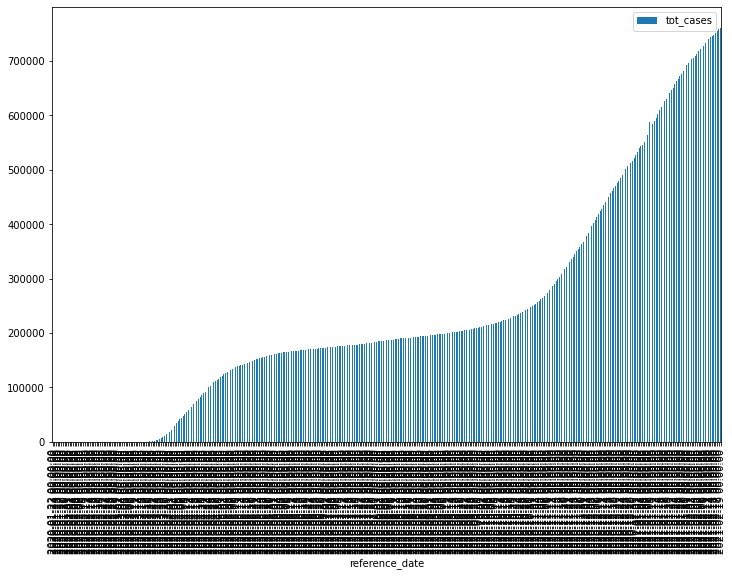

In [65]:
NJ_data_with_dates.plot.bar(y='tot_cases', figsize=(12,8))

In [163]:
def cases_in_state(state):
    ax = states_daily_data.query('state==@state').sort_values(by='date').plot.bar(y='positive', figsize=(12,8), title='Cases in ' + state)

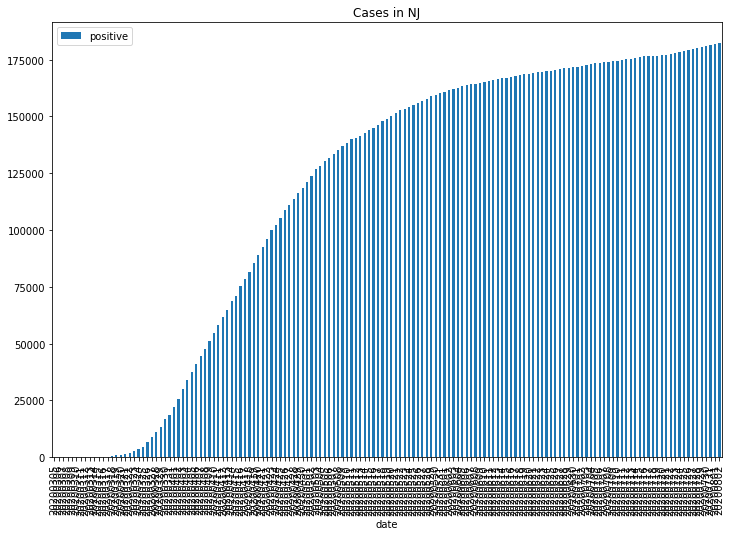

In [164]:
cases_in_state('NJ')

In [165]:
states_daily_data[states_daily_data['state'].isin(northeast)].query('date == @today')

state  positive   negative  pending  hospitalizedCurrently  \
date                                                                  
20200716    CT   47750.0   582333.0      NaN                   66.0   
20200716    DC   11076.0   129166.0      NaN                   86.0   
20200716    DE   13114.0   131756.0      NaN                   50.0   
20200716    MA  112581.0   889103.0      NaN                  557.0   
20200716    MD   75664.0   616865.0      NaN                  436.0   
20200716    ME    3598.0   126864.0      NaN                   13.0   
20200716    NH    6113.0   132159.0      NaN                   24.0   
20200716    NJ  176501.0  1583403.0      NaN                  862.0   
20200716    NY  404775.0  4516435.0      NaN                  813.0   
20200716    PA   98446.0   885195.0      NaN                  652.0   
20200716    PR   10574.0   255766.0      NaN                  280.0   
20200716    RI   17711.0   159677.0      NaN                   64.0   
20200716    VA   74431.0   786742.0    444.0                 1134.0   
20200716    VI     249.0     5036.0    168.0                    NaN   
20200716    VT    1325.0    77715.0      NaN                   25.0   
20200716    WV    4657.0   214517.0      NaN                   65.0   

          hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
date                                                                
20200716                 10654.0             NaN              NaN   
20200716                     NaN            24.0              NaN   
20200716                     NaN             8.0              NaN   
20200716                 11663.0            77.0              NaN   
20200716                 11687.0           137.0              NaN   
20200716                   374.0            11.0              NaN   
20200716                   668.0             NaN            192.0   
20200716                 20774.0           146.0              NaN   
20200716                 89995.0           165.0              NaN   
20200716                     NaN             NaN              NaN   
20200716                     NaN            25.0              NaN   
20200716                  2084.0             4.0              NaN   
20200716                 10778.0           248.0              NaN   
20200716                     NaN             NaN              NaN   
20200716                     NaN             NaN              NaN   
20200716                     NaN            29.0              NaN   

          onVentilatorCurrently  onVentilatorCumulative  ...   posNeg  \
date                                                     ...            
20200716                    NaN                     NaN  ...   630083   
20200716                   14.0                     NaN  ...   140242   
20200716                    NaN                     NaN  ...   144870   
20200716                   38.0                     NaN  ...  1001684   
20200716                    NaN                     NaN  ...   692529   
20200716                    4.0                     NaN  ...   130462   
20200716                    NaN                     NaN  ...   138272   
20200716                   64.0                     NaN  ...  1759904   
20200716                   88.0                     NaN  ...  4921210   
20200716                   95.0                     NaN  ...   983641   
20200716                   14.0                     NaN  ...   266340   
20200716                    3.0                     NaN  ...   177388   
20200716                  118.0                     NaN  ...   861173   
20200716                    NaN                     NaN  ...     5285   
20200716                    NaN                     NaN  ...    79040   
20200716                   13.0                     NaN  ...   219174   

         deathIncrease hospitalizedIncrease  \
date                                          
20200716             9                  102   
20200716             3         

In [166]:
northeast_daily_data = states_daily_data[states_daily_data['state'].isin(northeast)].groupby('date').sum()
us_daily_data = states_daily_data.groupby('date').sum()

In [167]:
northeast_daily_data

positive    negative  pending  hospitalizedCurrently  \
date                                                              
20200301        2.0         2.0      0.0                    0.0   
20200302        2.0         3.0      0.0                    0.0   
20200303        2.0         5.0      0.0                    0.0   
20200304       10.0        73.0     31.0                    0.0   
20200305       28.0       152.0     47.0                    0.0   
...             ...         ...      ...                    ...   
20200729  1125024.0  13301985.0    513.0                 5368.0   
20200730  1130150.0  13477226.0    521.0                 5366.0   
20200731  1136013.0  13682359.0    461.0                 4986.0   
20200801  1141423.0  13827862.0    409.0                 5004.0   
20200802  1146490.0  14010960.0    372.0                 4903.0   

          hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
date                                                                
20200301                     0.0             0.0              0.0   
20200302                     0.0             0.0              0.0   
20200303                     0.0             0.0              0.0   
20200304                     0.0             0.0              0.0   
20200305                     0.0             0.0              0.0   
...                          ...             ...              ...   
20200729                162622.0           911.0            202.0   
20200730                163123.0           895.0            205.0   
20200731                163430.0           869.0            207.0   
20200801                163504.0           893.0            208.0   
20200802                163623.0           882.0            208.0   

          onVentilatorCurrently  onVentilatorCumulative  recovered  ...  \
date                                                                ...   
20200301                    0.0                     0.0        0.0  ...   
20200302                    0.0                     0.0        0.0  ...   
20200303                    0.0                     0.0        0.0  ...   
20200304                    0.0                     0.0        0.0  ...   
20200305                    0.0                     0.0        0.0  ...   
...                         ...                     ...        ...  ...   
20200729                  481.0                     0.0   346030.0  ...   
20200730                  482.0                     0.0   347223.0  ...   
20200731                  450.0                     0.0   348665.0  ...   
20200801                  462.0                     0.0   350820.0  ...   
20200802                  457.0                     0.0   351639.0  ...   

          totalTestResults  totalTestResultsIncrease    posNeg  deathIncrease  \
date                                                                            
20200301                 4                         0         4              0   
20200302                 5                         1         5              0   
20200303                 7                         2         7              0   
20200304                83                        10        83              0   
20200305               180                        55       180              0   
...                    ...                       ...       ...            ...   
20200729          14427009                    206554  14427009             84   
20200730          14607376                    180367  14607376             95   
20200731          14818372                    210996  14818372             97   
20200801          14969285                    150913  14969285            101   
20200802          15157450                    188165  15157450             65   

          hospitalizedIncrease  commercialScore  negativeRegularScore  \
date                                                                    
20200301                     0                0                  

In [168]:
ticks_skip = 7

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


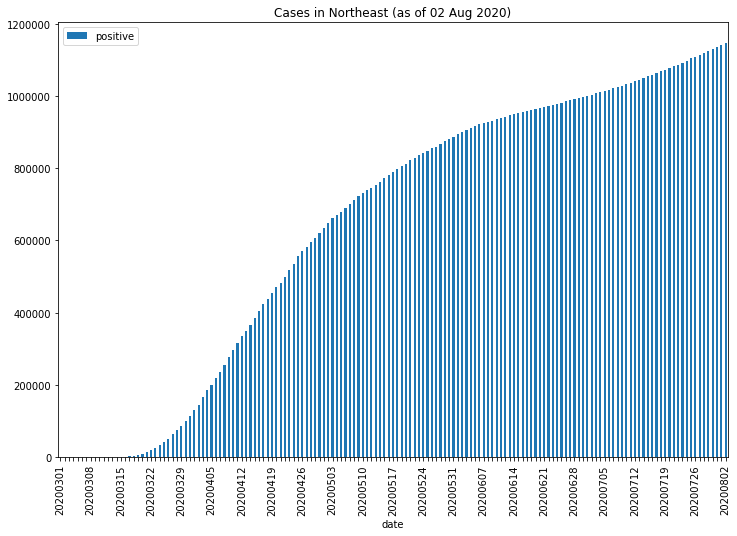

In [169]:
northeast_daily_data.plot.bar(y='positive', figsize=(12,8), title='Cases in Northeast (as of ' + datetime.date.today().strftime('%d %b %Y') + ')')
# northeast_daily_data.plot.bar(y='positiveIncrease_5d_average', ax=ax)
# northeast_daily_data.plot.bar(y='positiveIncrease_5d_average', figsize=(12,8), title='Daily additional cases in Northeast\n(5 days moving average as of ' + datetime.date.today().strftime('%d %b %Y') + ')')

ax = plt.axes()
for i, label in enumerate(ax.xaxis.get_ticklabels()[::-1]):
    if i % ticks_skip == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
# plt.yscale('log')
plt.show()
# plt.savefig('/Users/mathieu/Dropbox/0 - Preparedness/Team Rubicon/SitReps/COVID-19/NE_COVID-19_cases_'+today+'.png', bbox_inches='tight')
# plt.savefig('/Users/mathieu/OneDrive - Team Rubicon/COVID-19/NE_COVID-19_cases_'+today+'.png', bbox_inches='tight')

In [170]:
northeast_daily_data['positiveIncrease_7d_average'] = northeast_daily_data.positiveIncrease.rolling(window=7).mean()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


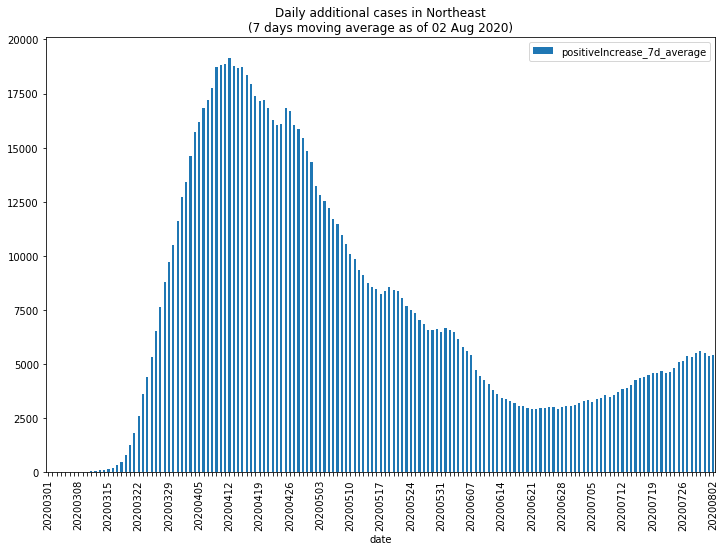

In [171]:
northeast_daily_data.plot.bar(y='positiveIncrease_7d_average', figsize=(12,8), title='Daily additional cases in Northeast\n(7 days moving average as of ' + datetime.date.today().strftime('%d %b %Y') + ')')

ax = plt.axes()
for i, label in enumerate(ax.xaxis.get_ticklabels()[::-1]):
    if i % ticks_skip == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
# plt.yscale('log')
plt.show()
# plt.savefig('/Users/mathieu/Dropbox/0 - Preparedness/Team Rubicon/SitReps/COVID-19/NE_COVID-19_additional_cases_7d_averaged_'+today+'.png', bbox_inches='tight')
# plt.savefig('/Users/mathieu/OneDrive - Team Rubicon/COVID-19/NE_COVID-19_additional_cases_7d_averaged_'+today+'.png', bbox_inches='tight')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


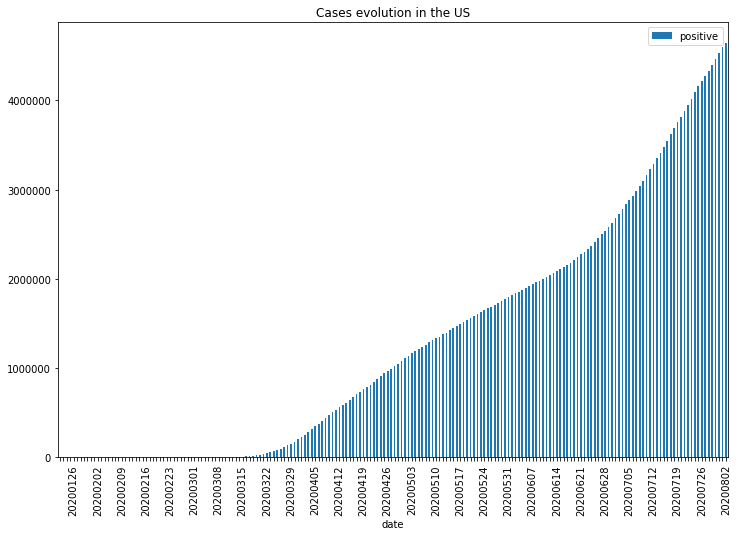

In [172]:
# ax = us_daily_data.plot.bar(y={'total','positive'}, figsize=(12,8))
ticks_skip = 7
us_daily_data.plot.bar(y='positive', figsize=(12,8), title='Cases evolution in the US')
ax = plt.axes()
for i, label in enumerate(ax.xaxis.get_ticklabels()[::-1]):
    if i % ticks_skip == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)
# plt.yscale('log')
plt.show()

In [173]:
def new_cases_table(state='US', skip=7):
    temp_table = states_daily_data.copy()
    if state == 'US':
        temp_table = temp_table.groupby('date').sum()
    elif state == 'NE':
        temp_table = temp_table[temp_table['state'].isin(northeast)].groupby('date').sum()
    else:
        temp_table = temp_table.query('state == @state').groupby('date').sum()
    label = 'positiveIncrease_' + str(skip) + 'd_average'
    temp_table[label] = temp_table.positiveIncrease.rolling(window=skip).mean()
#     temp_table[label][temp_table[label] < 0] = 0
    temp_table.loc[temp_table.loc[:, label] < 0, label] = 0
    temp_table.loc[temp_table.loc[:, 'positiveIncrease'] < 0, 'positiveIncrease'] = 0
    return temp_table, label

In [174]:
def plot_new_cases(state='US', skip=7, start_date='20200301'):
    fig, ax1 = plt.subplots()
    fig.figsize=(12,8)
    ax2 = ax1.twiny()  # set up the 2nd axis
    [temp_table, label] = new_cases_table(state, skip)
    temp_table.reset_index(inplace=True)
    temp_table['reference_date'] = pd.to_datetime(temp_table['date'].astype(str), format='%Y%m%d')
    title='Daily additional cases in ' + state + ' as of ' + today + '\n(' + str(skip) + ' days moving average in red)'
    temp_table.query('reference_date >= @start_date').plot(x='reference_date', y=label, ax=ax1, color='red', figsize=(12,8), title=title)
    temp_table.query('reference_date >= @start_date').plot.bar(y='positiveIncrease', ax=ax2, alpha=0.5)
    
#     for i, label in enumerate(ax1.xaxis.get_ticklabels()[::-1]):
#         if i % skip == 0:
#             label.set_visible(True)
#         else:
#             label.set_visible(False)
    ax1.get_legend().remove()
    ax1.xaxis.set_label_text('')
    ax1.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
    ax2.set_xticklabels([])
    ax2.set_xticks([])
    ax2.get_legend().remove()
    plt.show()

In [175]:
[temp_table, label] = new_cases_table('US', 14)
temp_table.reset_index(inplace=True)
temp_table['reference_date'] = pd.to_datetime(temp_table['date'].astype(str), format='%Y%m%d')
temp_table 
# temp_table.loc[temp_table.loc[:, label] > 0, label]
# temp_table.plot(x='reference_date',y=label)

# plt.gcf().autofmt_xdate()
# plt.show()
# temp_table.dtypes

date   positive    negative  pending  hospitalizedCurrently  \
0    20200122        2.0         0.0      0.0                    0.0   
1    20200123        2.0         0.0      0.0                    0.0   
2    20200124        2.0         0.0      0.0                    0.0   
3    20200125        2.0         0.0      0.0                    0.0   
4    20200126        2.0         0.0      0.0                    0.0   
..        ...        ...         ...      ...                    ...   
189  20200729  4398386.0  49442761.0   3840.0                57332.0   
190  20200730  4468104.0  50185923.0   3947.0                56462.0   
191  20200731  4535607.0  50837376.0   3956.0                55536.0   
192  20200801  4595871.0  51490389.0   3975.0                54448.0   
193  20200802  4644565.0  52167597.0   3888.0                53908.0   

     hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                       0.0             0.0              0.0   
1                       0.0             0.0              0.0   
2                       0.0             0.0              0.0   
3                       0.0             0.0              0.0   
4                       0.0             0.0              0.0   
..                      ...             ...              ...   
189                302078.0         10539.0          13744.0   
190                305485.0         10517.0          13875.0   
191                308088.0         10473.0          14044.0   
192                310384.0         10433.0          14227.0   
193                311223.0         10405.0          14288.0   

     onVentilatorCurrently  onVentilatorCumulative  ...    posNeg  \
0                      0.0                     0.0  ...         2   
1                      0.0                     0.0  ...         2   
2                      0.0                     0.0  ...         2   
3                      0.0                     0.0  ...         2   
4                      0.0                     0.0  ...         2   
..                     ...                     ...  ...       ...   
189                 2772.0                  1400.0  ...  53841147   
190                 2760.0                  1415.0  ...  54654027   
191                 2702.0                  1437.0  ...  55372983   
192                 2699.0                  1445.0  ...  56086260   
193                 2644.0                  1448.0  ...  56812162   

     deathIncrease  hospitalizedIncrease  commercialScore  \
0                0                     0                0   
1                0                     0                0   
2                0                     0                0   
3                0                     0                0   
4                0                     0                0   
..             ...                   ...              ...   
189           1447                  2934                0   
190           1262                  3407                0   
191           1308                  2603                0   
192           1172                  2296                0   
193            515                   839                0   

     negativeRegularScore  negativeScore  positiveScore  score  \
0                       0              0              0      0   
1                       0              0              0      0   
2                       0              0              0      0   
3                       0              0              0      0   
4                       0              0              0      0   
..                    ...            ...            ...    ...   
189                     0              0              0      0   
190                     0              0              0      0   
191                     0              0              0      0   
192                     0              0              0      0   
193                     0              0              0      0   

     positiveIncreas

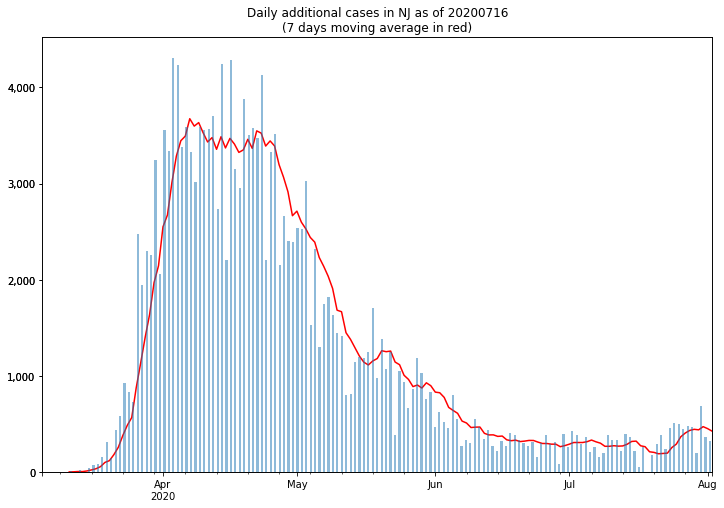

In [207]:
plot_new_cases('NJ', 7)

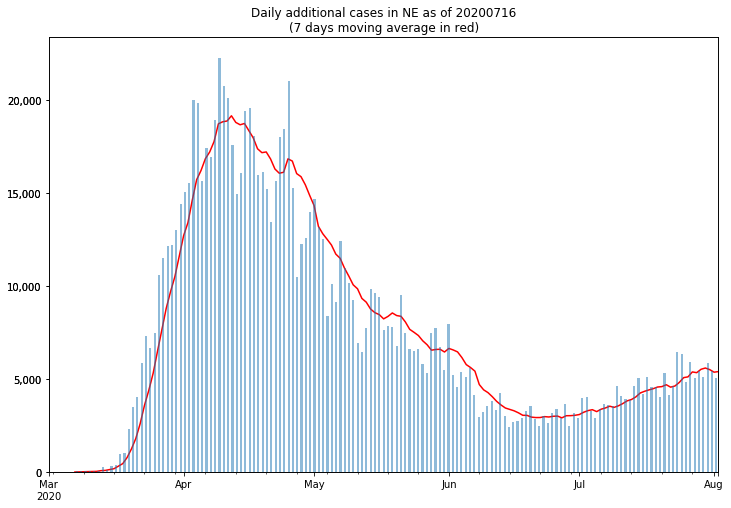

In [209]:
plot_new_cases('NE', 7)

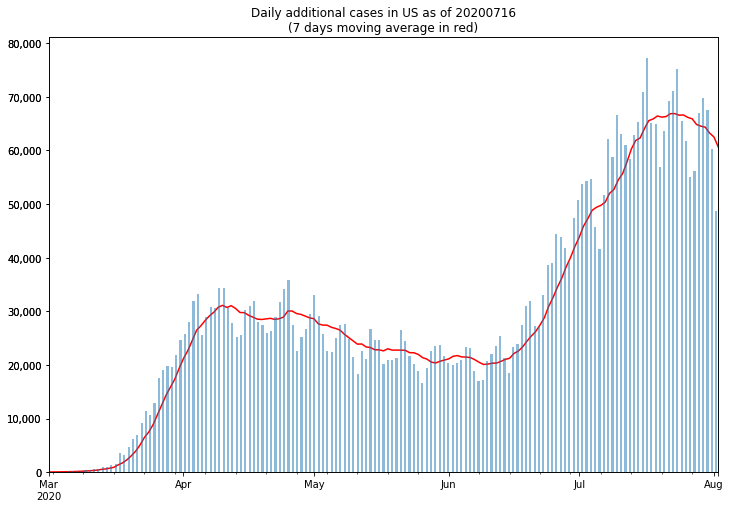

In [210]:
plot_new_cases('US', 7)

In [177]:
us_daily_data

positive    negative  pending  hospitalizedCurrently  \
date                                                              
20200122        2.0         0.0      0.0                    0.0   
20200123        2.0         0.0      0.0                    0.0   
20200124        2.0         0.0      0.0                    0.0   
20200125        2.0         0.0      0.0                    0.0   
20200126        2.0         0.0      0.0                    0.0   
...             ...         ...      ...                    ...   
20200729  4398386.0  49442761.0   3840.0                57332.0   
20200730  4468104.0  50185923.0   3947.0                56462.0   
20200731  4535607.0  50837376.0   3956.0                55536.0   
20200801  4595871.0  51490389.0   3975.0                54448.0   
20200802  4644565.0  52167597.0   3888.0                53908.0   

          hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
date                                                                
20200122                     0.0             0.0              0.0   
20200123                     0.0             0.0              0.0   
20200124                     0.0             0.0              0.0   
20200125                     0.0             0.0              0.0   
20200126                     0.0             0.0              0.0   
...                          ...             ...              ...   
20200729                302078.0         10539.0          13744.0   
20200730                305485.0         10517.0          13875.0   
20200731                308088.0         10473.0          14044.0   
20200801                310384.0         10433.0          14227.0   
20200802                311223.0         10405.0          14288.0   

          onVentilatorCurrently  onVentilatorCumulative  recovered  ...  \
date                                                                ...   
20200122                    0.0                     0.0        0.0  ...   
20200123                    0.0                     0.0        0.0  ...   
20200124                    0.0                     0.0        0.0  ...   
20200125                    0.0                     0.0        0.0  ...   
20200126                    0.0                     0.0        0.0  ...   
...                         ...                     ...        ...  ...   
20200729                 2772.0                  1400.0  1390568.0  ...   
20200730                 2760.0                  1415.0  1414155.0  ...   
20200731                 2702.0                  1437.0  1438160.0  ...   
20200801                 2699.0                  1445.0  1461885.0  ...   
20200802                 2644.0                  1448.0  1468689.0  ...   

          totalTestResults  totalTestResultsIncrease    posNeg  deathIncrease  \
date                                                                            
20200122                 2                         0         2              0   
20200123                 2                         0         2              0   
20200124                 2                         0         2              0   
20200125                 2                         0         2              0   
20200126                 2                         0         2              0   
...                    ...                       ...       ...            ...   
20200729          53841147                    855570  53841147           1447   
20200730          54654027                    812880  54654027           1262   
20200731          55372983                    718956  55372983           1308   
20200801          56086260                    713277  56086260           1172   
20200802          56812162                    725902  56812162            515   

          hospitalizedIncrease  commercialScore  negativeRegularScore  \
date                                                                    
20200122                     0                0                  

In [178]:
states_daily_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8417 entries, 20200802 to 20200122
Data columns (total 40 columns):
state                       8417 non-null object
positive                    8402 non-null float64
negative                    8261 non-null float64
pending                     1078 non-null float64
hospitalizedCurrently       5829 non-null float64
hospitalizedCumulative      4519 non-null float64
inIcuCurrently              2998 non-null float64
inIcuCumulative             1225 non-null float64
onVentilatorCurrently       2614 non-null float64
onVentilatorCumulative      434 non-null float64
recovered                   5222 non-null float64
dataQualityGrade            8208 non-null object
lastUpdateEt                8208 non-null object
dateModified                8073 non-null object
checkTimeEt                 8073 non-null object
death                       7719 non-null float64
hospitalized                4519 non-null float64
dateChecked                 8073 non-n

In [179]:
northeast_states_daily_data_map = gpd.GeoDataFrame(states_daily_data.join(northeast_arranged_map.set_index('STUSPS'), on='state', how='inner'), crs="EPSG:4326")

In [180]:
northeast_states_daily_data_map.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 2385 entries, 20200802 to 20200306
Data columns (total 54 columns):
state                       2385 non-null object
positive                    2385 non-null float64
negative                    2349 non-null float64
pending                     516 non-null float64
hospitalizedCurrently       1804 non-null float64
hospitalizedCumulative      1105 non-null float64
inIcuCurrently              1150 non-null float64
inIcuCumulative             101 non-null float64
onVentilatorCurrently       1052 non-null float64
onVentilatorCumulative      11 non-null float64
recovered                   1686 non-null float64
dataQualityGrade            2339 non-null object
lastUpdateEt                2339 non-null object
dateModified                2313 non-null object
checkTimeEt                 2313 non-null object
death                       2183 non-null float64
hospitalized                1105 non-null float64
dateChecked                 2313 

In [181]:
northeast_arranged_map.crs

<Geographic 2D CRS: EPSG:4269>
Name: NAD83
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: North America - NAD83
- bounds: (167.65, 14.92, -47.74, 86.46)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

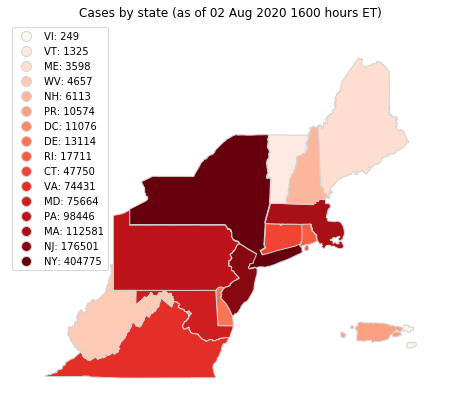

In [182]:
data=northeast_states_daily_data_map.query('date==@today')
scheme = mc.Quantiles(data['positive'],k=len(data['positive']))
legend_labels = [row['state'] + ': ' + str(math.floor(row['positive'])) for i, row in data.sort_values(by='positive', ascending=True).iterrows()]
ax=gpl.choropleth(data, projection=gcrs.WebMercator(), figsize=(8,8), hue='positive', scheme=scheme, cmap='Reds', edgecolor='lightgray', linewidth=1, legend=True, legend_labels=legend_labels, legend_kwargs={'loc': 'upper left'})
plt.title('Cases by state (as of ' + datetime.date.today().strftime('%d %b %Y') + ' 1600 hours ET)')
plt.show()

In [183]:
data

state  positive   negative  pending  hospitalizedCurrently  \
date                                                                  
20200716    CT   47750.0   582333.0      NaN                   66.0   
20200716    DC   11076.0   129166.0      NaN                   86.0   
20200716    DE   13114.0   131756.0      NaN                   50.0   
20200716    MA  112581.0   889103.0      NaN                  557.0   
20200716    MD   75664.0   616865.0      NaN                  436.0   
20200716    ME    3598.0   126864.0      NaN                   13.0   
20200716    NH    6113.0   132159.0      NaN                   24.0   
20200716    NJ  176501.0  1583403.0      NaN                  862.0   
20200716    NY  404775.0  4516435.0      NaN                  813.0   
20200716    PA   98446.0   885195.0      NaN                  652.0   
20200716    PR   10574.0   255766.0      NaN                  280.0   
20200716    RI   17711.0   159677.0      NaN                   64.0   
20200716    VA   74431.0   786742.0    444.0                 1134.0   
20200716    VI     249.0     5036.0    168.0                    NaN   
20200716    VT    1325.0    77715.0      NaN                   25.0   
20200716    WV    4657.0   214517.0      NaN                   65.0   

          hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
date                                                                
20200716                 10654.0             NaN              NaN   
20200716                     NaN            24.0              NaN   
20200716                     NaN             8.0              NaN   
20200716                 11663.0            77.0              NaN   
20200716                 11687.0           137.0              NaN   
20200716                   374.0            11.0              NaN   
20200716                   668.0             NaN            192.0   
20200716                 20774.0           146.0              NaN   
20200716                 89995.0           165.0              NaN   
20200716                     NaN             NaN              NaN   
20200716                     NaN            25.0              NaN   
20200716                  2084.0             4.0              NaN   
20200716                 10778.0           248.0              NaN   
20200716                     NaN             NaN              NaN   
20200716                     NaN             NaN              NaN   
20200716                     NaN            29.0              NaN   

          onVentilatorCurrently  onVentilatorCumulative  ...  GEOID  \
date                                                     ...          
20200716                    NaN                     NaN  ...     09   
20200716                   14.0                     NaN  ...     11   
20200716                    NaN                     NaN  ...     10   
20200716                   38.0                     NaN  ...     25   
20200716                    NaN                     NaN  ...     24   
20200716                    4.0                     NaN  ...     23   
20200716                    NaN                     NaN  ...     33   
20200716                   64.0                     NaN  ...     34   
20200716                   88.0                     NaN  ...     36   
20200716                   95.0                     NaN  ...     42   
20200716                   14.0                     NaN  ...     72   
20200716                    3.0                     NaN  ...     44   
20200716                  118.0                     NaN  ...     51   
20200716                    NaN                     NaN  ...     78   
20200716                    NaN                     NaN  ...     50   
20200716                   13.0                     NaN  ...     54   

                                  NAME LSAD  MTFCC FUNCSTAT         ALAND  \
date                                                                        
20200716                   Connecticut   00  G4000    

In [184]:
for i, row in data.sort_values(by='positive', ascending=False).iterrows():
    print(row['state'])

NY
NJ
MA
PA
MD
VA
CT
RI
DE
DC
PR
NH
WV
ME
VT
VI


In [185]:
states_daily_data.query("state=='NY'").sort_values(by='date').index.values
states_daily_data.query("state=='NY'").sort_values(by='date')['positive']

date
20200304         6.0
20200305        22.0
20200306        33.0
20200307        76.0
20200308       105.0
              ...   
20200729    413593.0
20200730    414370.0
20200731    415014.0
20200801    415767.0
20200802    416298.0
Name: positive, Length: 152, dtype: float64

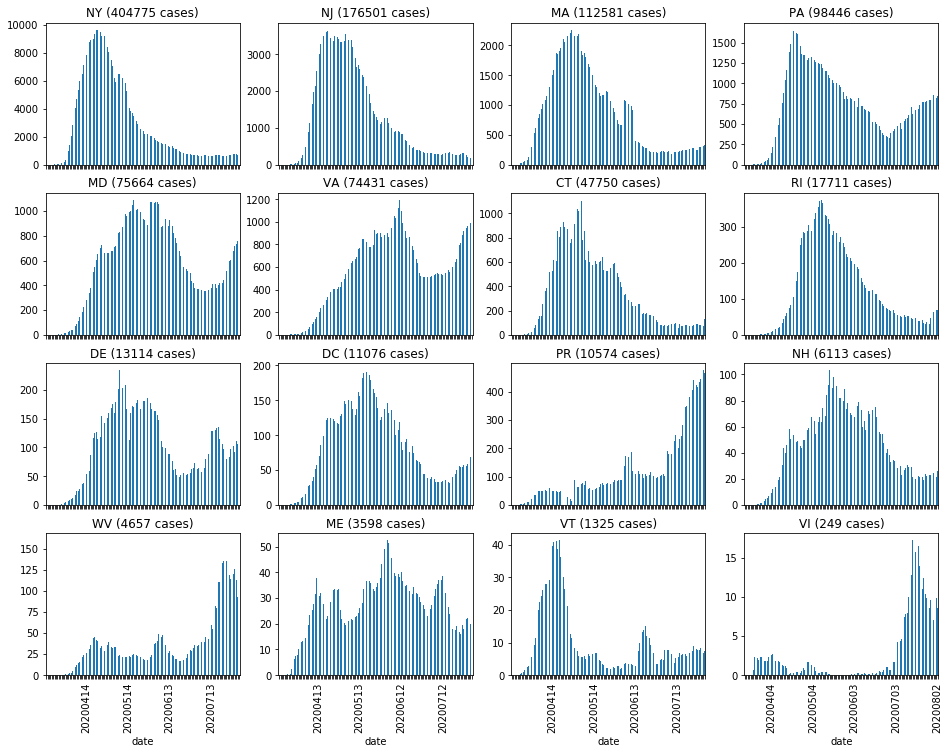

In [186]:
f, axarr = plt.subplots(4, 4, figsize=(16, 12), sharex=True, sharey=False)
j = 0
skip = 7
ticks_skip = 30

for i, row in data.sort_values(by='positive', ascending=False).iterrows():
    [temp_table, label] = new_cases_table(row['state'], skip)
    temp_table.sort_values(by='date')[label].plot.bar(ax=axarr[math.floor(j/4)][j%4])
    axarr[math.floor(j/4)][j%4].set_title(row['state'] + ' (' + str(math.floor(row['positive'])) + ' cases)')
    for index, mark in enumerate(axarr[math.floor(j/4)][j%4].xaxis.get_ticklabels()[::-1]):
        if index % ticks_skip == 0:
            mark.set_visible(True)
        else:
            mark.set_visible(False)
    j = j + 1
    

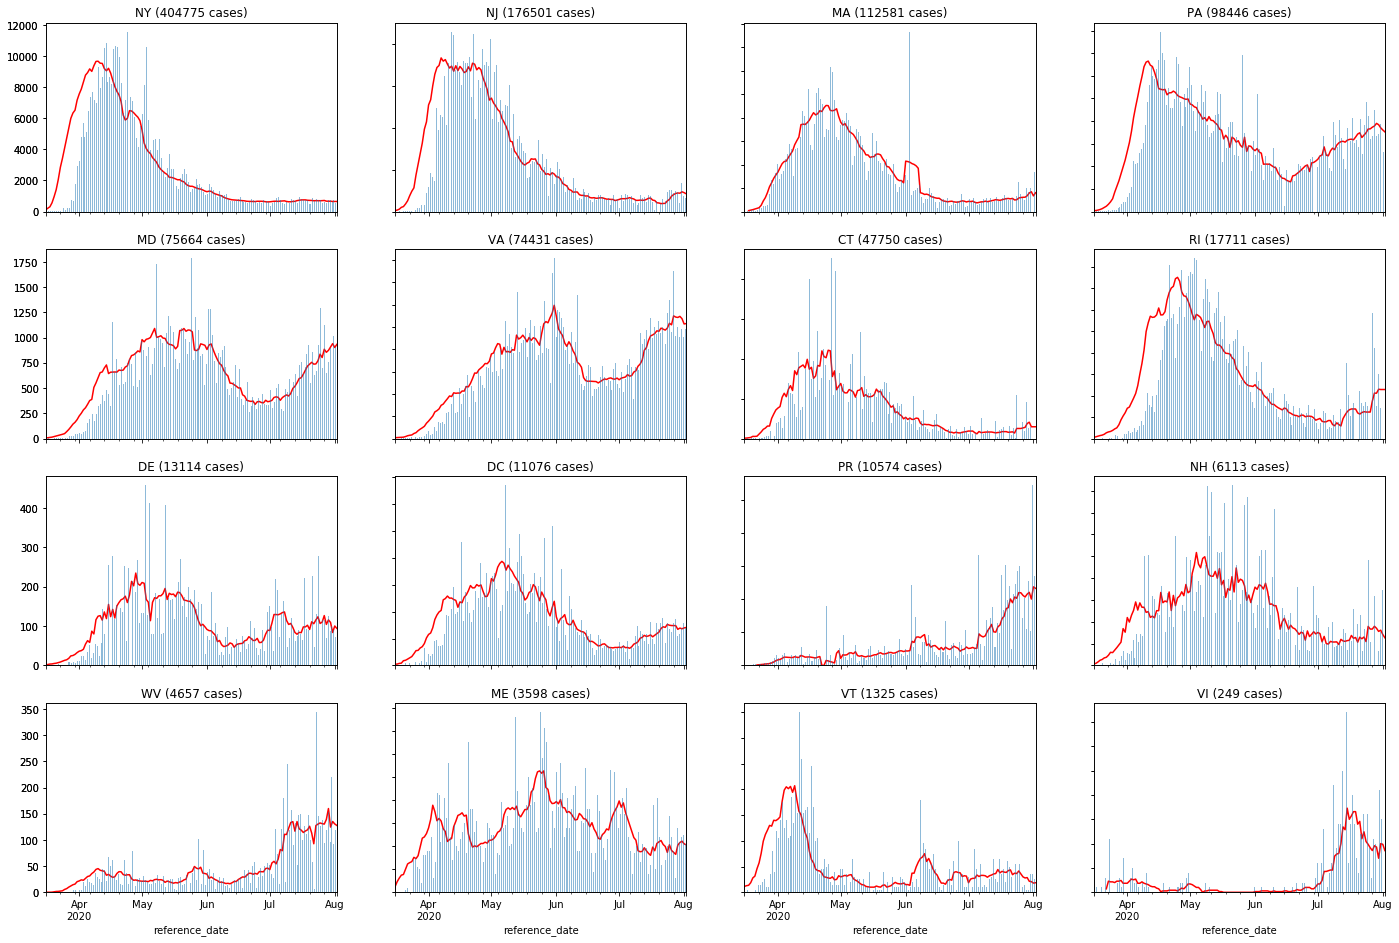

In [187]:
f, axarr = plt.subplots(4, 4, figsize=(24, 16), sharex=True, sharey=False)
j = 0
skip = 7
ticks_skip = 30

for i, row in data.sort_values(by='positive', ascending=False).iterrows():
    [temp_table, label] = new_cases_table(row['state'], skip)
    temp_table.reset_index(inplace=True)
    temp_table['reference_date'] = pd.to_datetime(temp_table['date'].astype(str), format='%Y%m%d')
    title = row['state'] + ' (' + str(math.floor(row['positive'])) + ' cases)'
    
    ax1 = axarr[math.floor(j/4)][j%4]
    ax2 = ax1.twiny()
    
    temp_table.plot(x='reference_date', y=label, ax=ax1, color='red', title=title)
    temp_table.plot.bar(y='positiveIncrease', ax=ax2, alpha=0.5)

    ax2.set_xticklabels([])
    ax2.set_xticks([])
    ax1.get_legend().remove()
    ax2.get_legend().remove()
    
    j = j + 1
    
plt.show()

In [188]:
def plot_by_state(data=data, date=today):
    f, axarr = plt.subplots(4, 4, figsize=(16, 12), sharex=True, sharey=False)
    j = 0
    skip = 7
    ticks_skip = 30

    for i, row in data.sort_values(by='positive', ascending=False).iterrows():
        [temp_table, label] = new_cases_table(row['state'], skip)
        temp_table.sort_values(by='date')[label].plot.bar(ax=axarr[math.floor(j/4)][j%4])
        axarr[math.floor(j/4)][j%4].set_title(row['state'] + ' (' + str(math.floor(row['positive'])) + ' cases)')
        for index, mark in enumerate(axarr[math.floor(j/4)][j%4].xaxis.get_ticklabels()[::-1]):
            if index % ticks_skip == 0:
                mark.set_visible(True)
            else:
                mark.set_visible(False)
        j = j + 1
    plt.show()

In [189]:
manual_data = data.query('date==@today').copy()

In [190]:
manual_data.reset_index(inplace=True)
manual_data.set_index('state', inplace=True)
manual_data

date  positive   negative  pending  hospitalizedCurrently  \
state                                                                  
CT     20200716   47750.0   582333.0      NaN                   66.0   
DC     20200716   11076.0   129166.0      NaN                   86.0   
DE     20200716   13114.0   131756.0      NaN                   50.0   
MA     20200716  112581.0   889103.0      NaN                  557.0   
MD     20200716   75664.0   616865.0      NaN                  436.0   
ME     20200716    3598.0   126864.0      NaN                   13.0   
NH     20200716    6113.0   132159.0      NaN                   24.0   
NJ     20200716  176501.0  1583403.0      NaN                  862.0   
NY     20200716  404775.0  4516435.0      NaN                  813.0   
PA     20200716   98446.0   885195.0      NaN                  652.0   
PR     20200716   10574.0   255766.0      NaN                  280.0   
RI     20200716   17711.0   159677.0      NaN                   64.0   
VA     20200716   74431.0   786742.0    444.0                 1134.0   
VI     20200716     249.0     5036.0    168.0                    NaN   
VT     20200716    1325.0    77715.0      NaN                   25.0   
WV     20200716    4657.0   214517.0      NaN                   65.0   

       hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
state                                                            
CT                    10654.0             NaN              NaN   
DC                        NaN            24.0              NaN   
DE                        NaN             8.0              NaN   
MA                    11663.0            77.0              NaN   
MD                    11687.0           137.0              NaN   
ME                      374.0            11.0              NaN   
NH                      668.0             NaN            192.0   
NJ                    20774.0           146.0              NaN   
NY                    89995.0           165.0              NaN   
PA                        NaN             NaN              NaN   
PR                        NaN            25.0              NaN   
RI                     2084.0             4.0              NaN   
VA                    10778.0           248.0              NaN   
VI                        NaN             NaN              NaN   
VT                        NaN             NaN              NaN   
WV                        NaN            29.0              NaN   

       onVentilatorCurrently  onVentilatorCumulative  ...  GEOID  \
state                                                 ...          
CT                       NaN                     NaN  ...     09   
DC                      14.0                     NaN  ...     11   
DE                       NaN                     NaN  ...     10   
MA                      38.0                     NaN  ...     25   
MD                       NaN                     NaN  ...     24   
ME                       4.0                     NaN  ...     23   
NH                       NaN                     NaN  ...     33   
NJ                      64.0                     NaN  ...     34   
NY                      88.0                     NaN  ...     36   
PA                      95.0                     NaN  ...     42   
PR                      14.0                     NaN  ...     72   
RI                       3.0                     NaN  ...     44   
VA                     118.0                     NaN  ...     51   
VI                       NaN                     NaN  ...     78   
VT                       NaN                     NaN  ...     50   
WV                      13.0                     NaN  ...     54   

                               NAME LSAD  MTFCC FUNCSTAT         ALAND  \
state                                                                    
CT                      Connecticut   00  G4000        A   12542619303   
DC             District of Columbia   00  G4000        A     158351639   
DE  

In [191]:
manual_data.at['NH', 'positive'] =  2054

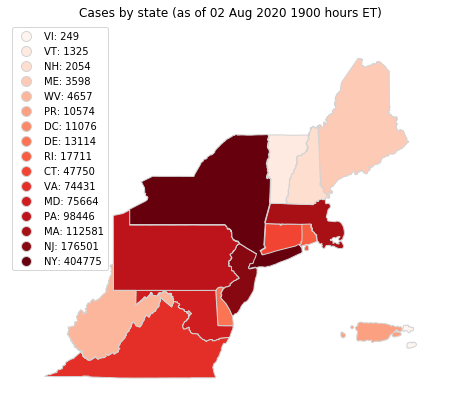

In [192]:
manual_data.reset_index(inplace=True)
scheme = mc.Quantiles(manual_data['positive'],k=len(manual_data['positive']))
legend_labels = [row['state'] + ': ' + str(math.floor(row['positive'])) for i, row in manual_data.sort_values(by='positive', ascending=True).iterrows()]
ax=gpl.choropleth(manual_data, projection=gcrs.WebMercator(), figsize=(8,8), hue='positive', scheme=scheme, cmap='Reds', edgecolor='lightgray', linewidth=1, legend=True, legend_labels=legend_labels, legend_kwargs={'loc': 'upper left'})
plt.title('Cases by state (as of ' + datetime.date.today().strftime('%d %b %Y') + ' 1900 hours ET)')

plt.show()

# plt.savefig('/Users/mathieu/Dropbox/0 - Preparedness/Team Rubicon/SitReps/COVID-19/COVID-19_sitrep_'+today+'_updated.png', bbox_inches='tight')
# plt.savefig('/Users/mathieu/OneDrive - Team Rubicon/COVID-19/COVID-19_sitrep_'+today+'_updated.png', bbox_inches='tight')

In [193]:
manual_data

state      date  positive   negative  pending  hospitalizedCurrently  \
0     CT  20200716   47750.0   582333.0      NaN                   66.0   
1     DC  20200716   11076.0   129166.0      NaN                   86.0   
2     DE  20200716   13114.0   131756.0      NaN                   50.0   
3     MA  20200716  112581.0   889103.0      NaN                  557.0   
4     MD  20200716   75664.0   616865.0      NaN                  436.0   
5     ME  20200716    3598.0   126864.0      NaN                   13.0   
6     NH  20200716    2054.0   132159.0      NaN                   24.0   
7     NJ  20200716  176501.0  1583403.0      NaN                  862.0   
8     NY  20200716  404775.0  4516435.0      NaN                  813.0   
9     PA  20200716   98446.0   885195.0      NaN                  652.0   
10    PR  20200716   10574.0   255766.0      NaN                  280.0   
11    RI  20200716   17711.0   159677.0      NaN                   64.0   
12    VA  20200716   74431.0   786742.0    444.0                 1134.0   
13    VI  20200716     249.0     5036.0    168.0                    NaN   
14    VT  20200716    1325.0    77715.0      NaN                   25.0   
15    WV  20200716    4657.0   214517.0      NaN                   65.0   

    hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                  10654.0             NaN              NaN   
1                      NaN            24.0              NaN   
2                      NaN             8.0              NaN   
3                  11663.0            77.0              NaN   
4                  11687.0           137.0              NaN   
5                    374.0            11.0              NaN   
6                    668.0             NaN            192.0   
7                  20774.0           146.0              NaN   
8                  89995.0           165.0              NaN   
9                      NaN             NaN              NaN   
10                     NaN            25.0              NaN   
11                  2084.0             4.0              NaN   
12                 10778.0           248.0              NaN   
13                     NaN             NaN              NaN   
14                     NaN             NaN              NaN   
15                     NaN            29.0              NaN   

    onVentilatorCurrently  ...  GEOID                          NAME LSAD  \
0                     NaN  ...     09                   Connecticut   00   
1                    14.0  ...     11          District of Columbia   00   
2                     NaN  ...     10                      Delaware   00   
3                    38.0  ...     25                 Massachusetts   00   
4                     NaN  ...     24                      Maryland   00   
5                     4.0  ...     23                         Maine   00   
6                     NaN  ...     33                 New Hampshire   00   
7                    64.0  ...     34                    New Jersey   00   
8                    88.0  ...     36                      New York   00   
9                    95.0  ...     42                  Pennsylvania   00   
10                   14.0  ...     72                   Puerto Rico   00   
11                    3.0  ...     44                  Rhode Island   00   
12                  118.0  ...     51                      Virginia   00   
13                    NaN  ...     78  United States Virgin Islands   00   
14                    NaN  ...     50                       Vermont   00   
15                   13.0  ...     54                 West Virginia   00   

    MTFCC FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
0   G4000        A   12542619303   1815495323  +41.5798637  -072.7466572   
1   G4000        A     158351639     18675956  +38.9041031  -077.0172290   
2   G4000        A    5047241079   1398670234  +38.9986239  -075.4416920   
3   G4000        A   20204287539   7130763257  +42.1565196

In [194]:
# manual_data = data.copy()

In [195]:
[row['state'] + ': ' + str(math.floor(row['positive'])) for i, row in manual_data.sort_values(by='positive', ascending=True).iterrows()]

['VI: 249',
 'VT: 1325',
 'NH: 2054',
 'ME: 3598',
 'WV: 4657',
 'PR: 10574',
 'DC: 11076',
 'DE: 13114',
 'RI: 17711',
 'CT: 47750',
 'VA: 74431',
 'MD: 75664',
 'PA: 98446',
 'MA: 112581',
 'NJ: 176501',
 'NY: 404775']

In [196]:
17%4

1

In [197]:
for i in range(16):
    print(i%4)

0
1
2
3
0
1
2
3
0
1
2
3
0
1
2
3


In [198]:
[row['state']  for i, row in manual_data.sort_values(by='positive', ascending=True).iterrows()]

['VI',
 'VT',
 'NH',
 'ME',
 'WV',
 'PR',
 'DC',
 'DE',
 'RI',
 'CT',
 'VA',
 'MD',
 'PA',
 'MA',
 'NJ',
 'NY']

In [199]:
manual_data.sort_values(by='positive', ascending=True)

state      date  positive   negative  pending  hospitalizedCurrently  \
13    VI  20200716     249.0     5036.0    168.0                    NaN   
14    VT  20200716    1325.0    77715.0      NaN                   25.0   
6     NH  20200716    2054.0   132159.0      NaN                   24.0   
5     ME  20200716    3598.0   126864.0      NaN                   13.0   
15    WV  20200716    4657.0   214517.0      NaN                   65.0   
10    PR  20200716   10574.0   255766.0      NaN                  280.0   
1     DC  20200716   11076.0   129166.0      NaN                   86.0   
2     DE  20200716   13114.0   131756.0      NaN                   50.0   
11    RI  20200716   17711.0   159677.0      NaN                   64.0   
0     CT  20200716   47750.0   582333.0      NaN                   66.0   
12    VA  20200716   74431.0   786742.0    444.0                 1134.0   
4     MD  20200716   75664.0   616865.0      NaN                  436.0   
9     PA  20200716   98446.0   885195.0      NaN                  652.0   
3     MA  20200716  112581.0   889103.0      NaN                  557.0   
7     NJ  20200716  176501.0  1583403.0      NaN                  862.0   
8     NY  20200716  404775.0  4516435.0      NaN                  813.0   

    hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
13                     NaN             NaN              NaN   
14                     NaN             NaN              NaN   
6                    668.0             NaN            192.0   
5                    374.0            11.0              NaN   
15                     NaN            29.0              NaN   
10                     NaN            25.0              NaN   
1                      NaN            24.0              NaN   
2                      NaN             8.0              NaN   
11                  2084.0             4.0              NaN   
0                  10654.0             NaN              NaN   
12                 10778.0           248.0              NaN   
4                  11687.0           137.0              NaN   
9                      NaN             NaN              NaN   
3                  11663.0            77.0              NaN   
7                  20774.0           146.0              NaN   
8                  89995.0           165.0              NaN   

    onVentilatorCurrently  ...  GEOID                          NAME LSAD  \
13                    NaN  ...     78  United States Virgin Islands   00   
14                    NaN  ...     50                       Vermont   00   
6                     NaN  ...     33                 New Hampshire   00   
5                     4.0  ...     23                         Maine   00   
15                   13.0  ...     54                 West Virginia   00   
10                   14.0  ...     72                   Puerto Rico   00   
1                    14.0  ...     11          District of Columbia   00   
2                     NaN  ...     10                      Delaware   00   
11                    3.0  ...     44                  Rhode Island   00   
0                     NaN  ...     09                   Connecticut   00   
12                  118.0  ...     51                      Virginia   00   
4                     NaN  ...     24                      Maryland   00   
9                    95.0  ...     42                  Pennsylvania   00   
3                    38.0  ...     25                 Massachusetts   00   
7                    64.0  ...     34                    New Jersey   00   
8                    88.0  ...     36                      New York   00   

    MTFCC FUNCSTAT         ALAND       AWATER     INTPTLAT      INTPTLON  \
13  G4000        A     348013711   1550244357  +18.3267484  -064.9712505   
14  G4000        A   23873457570   1031134839  +44.0604795  -072.6733274   
6   G4000        A   23187445452   1028643155  +43.6726907  -071.5843145   
5   G4000        A   79885808421  11748168571  +45.4092789

In [200]:
skip_factor = 3
dates_axis = list(northeast_daily_data.index[::-skip_factor])[::-1]
factor = math.floor(len(dates_axis)/skip_factor) + 1

In [201]:
factor

18

In [202]:
import matplotlib.ticker as ticker

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


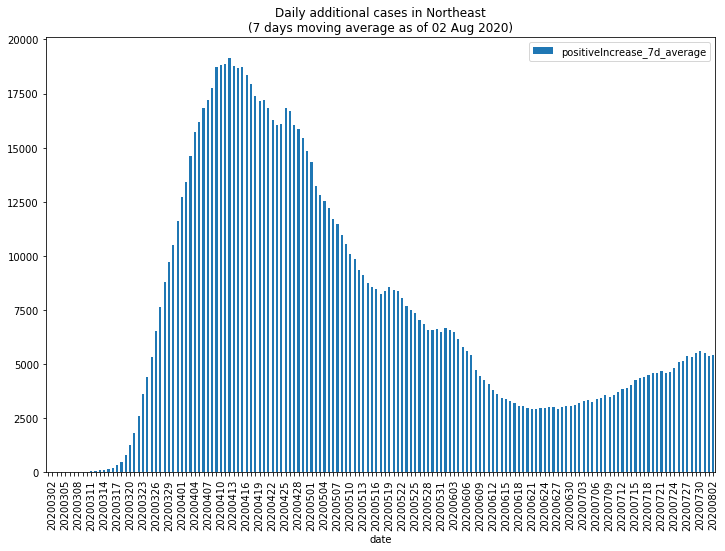

In [203]:
northeast_daily_data.plot.bar(y='positiveIncrease_7d_average', figsize=(12,8), title='Daily additional cases in Northeast\n(7 days moving average as of ' + datetime.date.today().strftime('%d %b %Y') + ')')

ax = plt.axes()
for i, label in enumerate(ax.xaxis.get_ticklabels()[::-1]):
    if i % skip_factor == 0:
        label.set_visible(True)
    else:
        label.set_visible(False)

plt.show()

In [204]:
list(pd.read_csv('recipients.csv')['Recipient'])

['matt.bourg@teamrubiconusa.org',
 'leah.bortnick@teamrubiconusa.org',
 'cathryn.wile@teamrubiconusa.org',
 'sean.peavey@teamrubiconusa.org']

In [205]:
truc = ', '.join(list(pd.read_csv('recipients.csv')['Recipient']))
truc

'matt.bourg@teamrubiconusa.org, leah.bortnick@teamrubiconusa.org, cathryn.wile@teamrubiconusa.org, sean.peavey@teamrubiconusa.org'

In [206]:
', '.join(['matt.bourg@teamrubiconusa.org', 'leah.bortnick@teamrubiconusa.org', 'cathryn.wile@teamrubiconusa.org', 'sean.peavey@teamrubiconusa.org'])


'matt.bourg@teamrubiconusa.org, leah.bortnick@teamrubiconusa.org, cathryn.wile@teamrubiconusa.org, sean.peavey@teamrubiconusa.org'